<a href="https://colab.research.google.com/github/388050gomes/AirBnb-New-York/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb em *New York City*

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma de aluguel de hospedagens, que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo. Seu grande diferencial é oferecer alternativas às hospedagens tradicionais, incluindo casas e apartamentos em bairros residenciais no Brasil e em mais 190 países.

Sua sigla tem o seguinte significado:

* "BnB" - refere-se a expressão "bed and breakfast" que em português nada mais é do que "cama e café da manhã".
* "Air" - simboliza de onde tudo começou, em que dois dos fututros fundadores alugaram colchões infláveis na casa em que moravam para visitantes de uma feira de desing depois que esgotaram as vagas nos hotéis em São Francisco - EUA.

Atualmente é a maior empresa hoteleira, mesmo sem possuir sequer um hotel, em vez disso lucra recebendo comissão de cada reserva. O AirBnB satisfaz de modo simultâneo tanto aos que querem viajar quanto aqueles que pretendem alugar seus imóveis. 

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes a cidade New York City, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-01-06/visualisations/listings.csv).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listngs.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-01-06/visualisations/listings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Análise dos Dados

Esta parte nos dá uma noção inical dos dados e como estão estruturados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 

Antes de dar início a análise, vamos observar a aparência do *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,334,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,409,2021-10-22,4.62,1,214,26,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.33,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,152,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,514,2021-12-21,3.33,1,198,40,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Tanto o número de linhas do dataset, que são as entradas, quanto as variáveis, que são as colunas, podem ser verificados utilizando o comando `shape`.

Já para descobrir os tipos de variáveis recorremos ao `dtypes`.

In [ ]:
# identificar o volume de dados do DataFrame
shape = df.shape
print(str(shape[0]) + ' Entradas')
print(str(shape[1]) + ' variáveis\n')

# verificar as 5 primeiras entradas do dataset
df.dtypes


38185 Entradas
18 variáveis



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante verificar a existência de valores nulos no conjunto de dados e se são significantes, pois podem prejudicar a correta análise. Para isso usamos o comando abaixo.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.999974
reviews_per_month                 0.240304
last_review                       0.240304
host_name                         0.001231
name                              0.000367
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Verifica-se que:

*  a variável `license` apresenta quase 100% de valores faltantes;
* a grande maioria das variáveis têm dados completos;
* as demais colunas têm valores nulos inferior a 1%, a exceção de `last_review` e `reviews_per_month` com 24,03%.


### **Q3. Qual o tipo de distribuição das variáveis?** 

Para evidenciar como as variáveis estão distribuídas, o histograma é uma boa ferramenta.

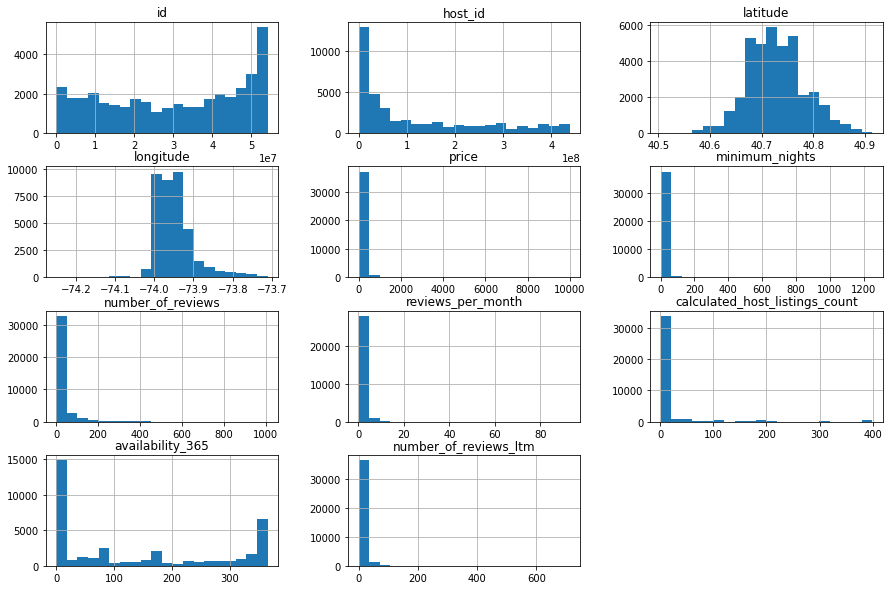

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

A média de preços em que os imóveis são alugados é obtida fazendo:

In [ ]:
# ver a média da coluna `price``
mean = df.price.mean()
print('R$ {:.2f}'. format(mean))

R$ 159.29


### **Q4. Qual a correlação existente entre as variáveis**

Queremos verificar como as variáveis numéricas se relacionam, se elas se correlacionam positiva ou negativamente e com que intensidade isso ocorre.

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.010799,-0.036056,-0.023157,-0.019704,0.057245
minimum_nights,-0.010799,1.000000,-0.150529,-0.273993,0.105253,-0.029821
number_of_reviews,-0.036056,-0.150529,1.000000,0.512448,-0.109338,0.095004
reviews_per_month,-0.023157,-0.273993,0.512448,1.000000,0.010645,0.219801
calculated_host_listings_count,-0.019704,0.105253,-0.109338,0.010645,1.000000,0.187199
availability_365,0.057245,-0.029821,0.095004,0.219801,0.187199,1.000000


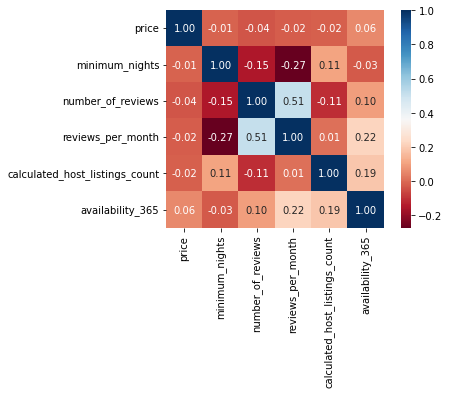

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

De modo geral, as variáveis não apresentam uma forte correlação positiva. As que demonstraram ter correlações positivas mais fortes foram:

* número de reviews e reviews por mês: 0.51

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna room_type mostra os tipos de imóveis que são alugados. O comando ` value_counts` soma a quantidade de cada tipo de imóvel locado.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    20376
Private room       17034
Shared room          566
Hotel room           209
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts () / df.shape[0]

Entire home/apt    0.533613
Private room       0.446091
Shared room        0.014823
Hotel room         0.005473
Name: room_type, dtype: float64

Casa completa e quartos privados são disparados os mais procurados, correspondendo a 97,97% da demanda por locação de imóveis.

### **Q6. Qual a localidade mais cara do dataset?**

O que queremos é verificar em quais bairros há uma maior valorização nos aluguéis dos imóveis. Para isso agrupamos todos os imóveis de cada bairro e calculamos os respectivos preços médios de aluguel.

Abaixo o top 10 dos bairros com médias de preços mais elavados.



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Jamaica Estates      925.107143
Fort Wadsworth       800.000000
Tribeca              465.525180
Briarwood            372.529412
Riverdale            372.300000
Flatiron District    369.915493
SoHo                 311.184739
Willowbrook          309.000000
Navy Yard            303.428571
Neponsit             295.000000
Name: price, dtype: float64

O mapa abaixo evidencia o grau de dispersão dos imóveis.

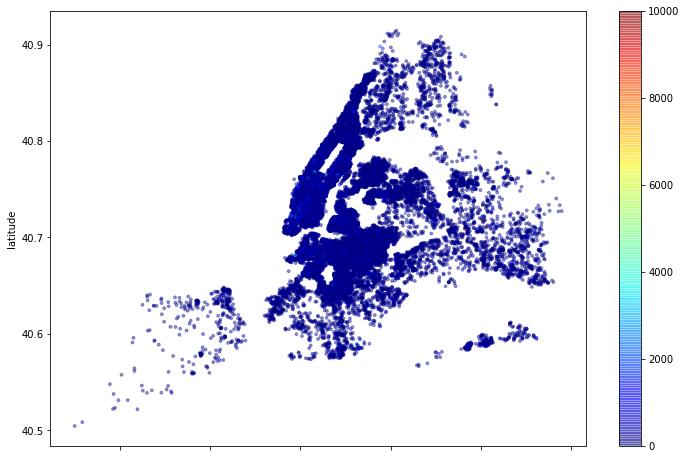

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Basta calcular a média da variável minimum_night através do seguinte comando:

In [ ]:
# ver a média da coluna `minimum_nights``
mean_nights=df.minimum_nights.mean()
print('Em média, a quantidade mínima de noites que são alugados os imóveis é de {:.0f} noites'. format(mean_nights))


Em média, a quantidade mínima de noites que são alugados os imóveis é de 21 noites


## Conclusões


Por ter sido utilizada uma versão de dataset resumido, alguma informação explicitada neste trabalho pode ter sido distorcida da realidade, ou seja, a amostra do dataset em algum momento pode não retratar o parâmetro populacional, principalmente no que diz respeito a localidade mais cara de aluguel dos imóveis, pois por ter menos dados para analisar pode ter sofrido um vies provocado por outliers.

Contudo, a maneira utilizada para análise dos dados é uma forma consistente de gerar informações sobre determinada realidade.